# Session 2 – Supervised Learning

In this notebook, we will:
- Understand the concept of regression and classification
- Train a Linear Regression model using scikit-learn
- Evaluate model performance with appropriate metrics
- Visualize predictions vs real values
- Train and evaluate a Logistic Regression classifier
- Experiment with alternative classifiers

Dataset source:  **Diabetes dataset** and **Breast Cancer dataset** included in scikit-learn.  

## Part 1: Regression with the Diabetes Dataset

We’ll use the **Diabetes dataset** included in scikit-learn.  
It contains data from patients with diabetes, including clinical measurements such as age, BMI, blood pressure, and blood serum variables.  

Our goal will be to **predict disease progression** (a continuous target variable) based on these features.


In [58]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# Load the dataset
diabetes = load_diabetes()

# Create a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Inspect and Prepare the Data

Do we need any preprocessing this time?

In [59]:
# Check basic info
print(df.info())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

### Split the Data

We’ll separate our dataset into:
- **Features (X)**: the 10 clinical variables  
- **Target (y)**: the disease progression measure  

Then we’ll split it into training and test sets to evaluate performance on unseen data.

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 353, Testing samples: 89


### Train a Linear Regression Model

We’ll use **LinearRegression** from scikit-learn, which fits a straight line to predict a continuous target variable.

Let's first try to fit a regression with only the age variable:

In [61]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
348,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357


In [62]:
from sklearn.linear_model import LinearRegression

X_train_age = X_train[['age']]
X_test_age = X_test[['age']]

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_age, y_train)

# Get predictions
y_pred = model.predict(X_test_age)

In [63]:
model.coef_

array([331.072172])

### Evaluate the Model

We’ll use **Mean Squared Error (MSE)** and **R² score** to measure performance.

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 5254.23
R² Score: 0.01


### Visualize Predictions

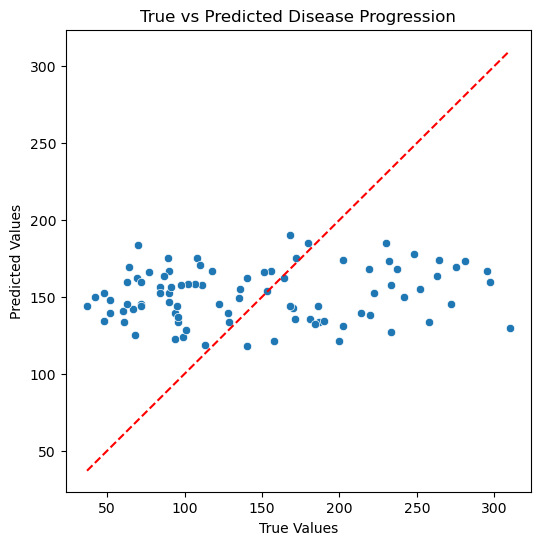

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Disease Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Exercise 1

1. Compute now a linear regression using all the features from the dataset
2. What does the model learn? Are coefficients positive or negative? What might that mean biologically?

**1. Compute now a linear regression using all the features from the dataset**

In [66]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

**2. What does the model learn? Are coefficients positive or negative? What might that mean biologically?**

In [67]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
8,s5,736.189098
2,bmi,542.425753
5,s2,518.044055
3,bp,347.708305
7,s4,275.310038
6,s3,163.403535
9,s6,48.671125
0,age,37.900314
1,sex,-241.966248
4,s1,-931.461261


### Exercise 2: Compute R² score, MAE and RMSE

Add two more evaluation metrics: 

1. R² score
2. Mean Absolute Error (MAE)
3. Root Mean Squared Error (RMSE)
4. Compare these values for train and for test. Which one is better?

*Hint:* from sklearn.metrics import mean_absolute_error

**1. R² score**

In [68]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.45


**2. Mean Absolute Error (MAE)**

In [69]:
from sklearn.metrics import mean_absolute_error

# Predictions already computed earlier
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 42.79


**3. Root Mean Squared Error (RMSE)**

In [70]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 53.85


**4. Compare these values for train and for test. Which one is better?**

In [71]:
y_pred_train = model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print(f"R² Score: {r2:.2f}")
mae = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.53
Mean Absolute Error (MAE): 43.48
Root Mean Squared Error (RMSE): 53.56


### Exercise 3: Plot again the predictions vs targets

Are the results better this time?

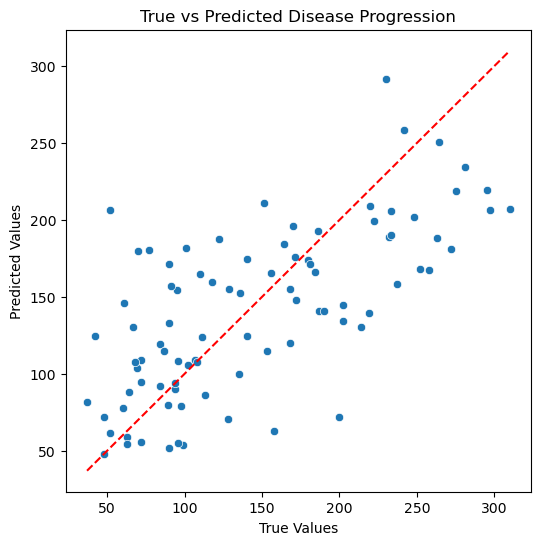

In [72]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Disease Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Exercise 4: Inspect the Residuals

The residuals are defined as the difference between the true values and the predicted values. 

1. Visualize the residuals in a histrogram. 
2. Plot a scatterplot of the residuals vs the predicted. 

Are the residuals centered around 0? Is there any pattern (heteroscedasticity)?

**1. Visualize the residuals in a histrogram.**

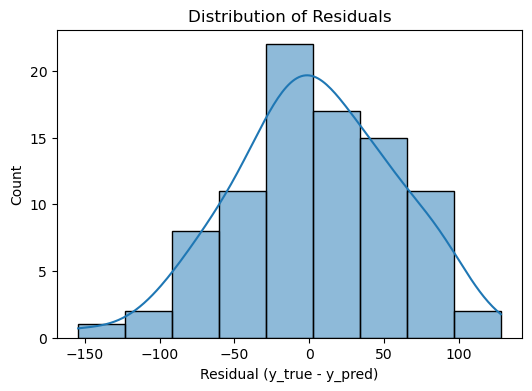

In [73]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (y_true - y_pred)")
plt.show()

**2. Plot a scatterplot of the residuals vs the predicted.**

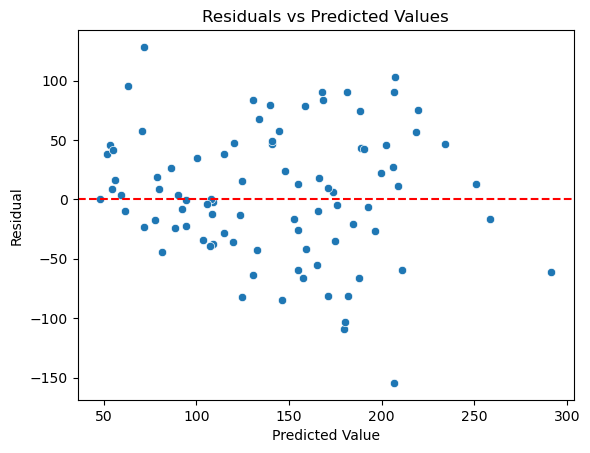

In [74]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.show()

### Exercise 5: Try Ridge Regression

Ridge regression adds regularization to reduce overfitting.

1. Import and train a Ridge() model.
2. Look at the coefficients this time. How do they compare to the Linear Regression?
3. Compare its R² score with LinearRegression.

*Hint:* from sklearn.linear_model import Ridge

**1. Import and train a Ridge() model.**

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

**2. Look at the coefficients this time. How do they compare to the Linear Regression?**

In [76]:
# Coefficients
coefficients_ridge = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients_ridge

,Feature,Coefficient
2,bmi,291.338216
8,s5,230.221232
3,bp,198.998019
7,s4,119.259960
9,s6,112.149810
0,age,45.366860
4,s1,-0.530434
5,s2,-28.577347
1,sex,-76.666366
6,s3,-144.512186


In [77]:
coefficients

,Feature,Coefficient
8,s5,736.189098
2,bmi,542.425753
5,s2,518.044055
3,bp,347.708305
7,s4,275.310038
6,s3,163.403535
9,s6,48.671125
0,age,37.900314
1,sex,-241.966248
4,s1,-931.461261


**3. Compare its R² score with LinearRegression.**

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression — R²: {r2_ridge:.3f},  MSE: {mse_ridge:.2f}")

Ridge Regression — R²: 0.419,  MSE: 3077.41


### Exercise 6: Hyperparameter Tuning for Ridge

Use a small loop to see how alpha affects regularization and performance. What would be the optimal alpha range?

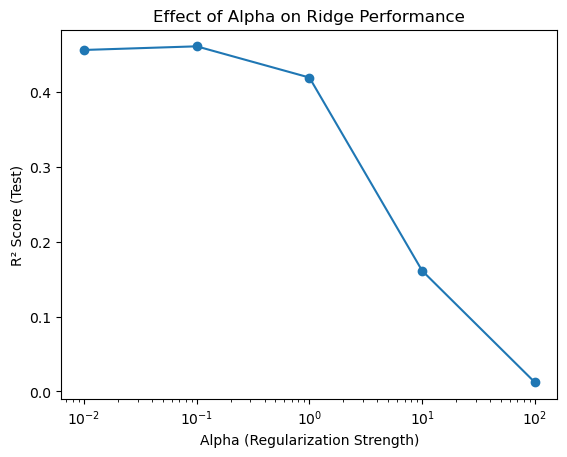

In [79]:
alphas = [0.01, 0.1, 1, 10, 100]
r2_scores = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    r2_scores.append(ridge.score(X_test, y_test))

plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("R² Score (Test)")
plt.title("Effect of Alpha on Ridge Performance")
plt.show()

### Exercise 7: Experiment also with Lasso

Try out Lasso regression and compare it with the previous models.

In [80]:
from sklearn.linear_model import Lasso

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

results = {}
for name, m in models.items():
    m.fit(X_train, y_train)
    results[name] = r2_score(y_test, m.predict(X_test))

pd.DataFrame.from_dict(results, orient='index', columns=['R² Score'])

,R² Score
Linear,0.452607
Ridge,0.419153
Lasso,0.456688


### Exercise 8: Feature Importance

Sort and plot the regression coefficients to see which features contribute most.

*Hint:* Use sns.barplot() with the coefficients DataFrame.

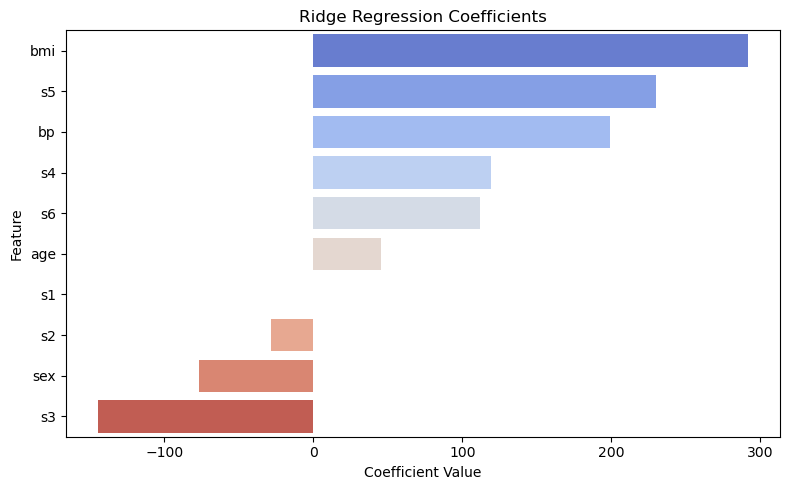

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(data=coefficients_ridge, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Additional Exercises

### Exercise 9: Polynomial Regression

Use PolynomialFeatures(degree=2) to add interaction terms and see if performance improves.

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print(f"Polynomial Regression (deg=2) R²: {r2_score(y_test, y_pred_poly):.3f}")

Polynomial Regression (deg=2) R²: 0.416


### Exercise 10: Feature Scaling Comparison

Compare model performance with and without StandardScaler.

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

pipe.fit(X_train, y_train)
y_pred_scaled = pipe.predict(X_test)

print(f"Ridge with Scaling — R²: {r2_score(y_test, y_pred_scaled):.3f}")

Ridge with Scaling — R²: 0.454


## Part 2: Classification with the Breast Cancer Dataset

We’ll use the **Breast Cancer dataset** included in scikit-learn.  
This dataset contains **diagnostic features** of breast tissue (e.g., radius, texture, symmetry), computed from digitized images of fine needle aspirates (FNA) of breast masses.

The task is to predict whether a tumor is **malignant (1)** or **benign (0)**.

In [84]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load the dataset
cancer = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df.info()
df.describe().T.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


Let's check the distribution of the targets:

In [86]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

### Split into Training and Test Sets

We’ll use an 80/20 split for training and testing.

This time we use *stratify=y* to maintain the same class proportion in both train and test sets.

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 455, Test samples: 114


### Train a Logistic Regression Classifier

Logistic Regression models the **probability** of belonging to a class.

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability for class 1 (malignant)

In [89]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(10)

,Feature,Coefficient
0,mean radius,1.931446
20,worst radius,1.150522
11,texture error,1.105580
1,mean texture,0.065366
19,fractal dimension error,0.005518
3,mean area,-0.001489
15,compactness error,-0.005483
10,radius error,-0.014211
12,perimeter error,-0.014828
14,smoothness error,-0.015838


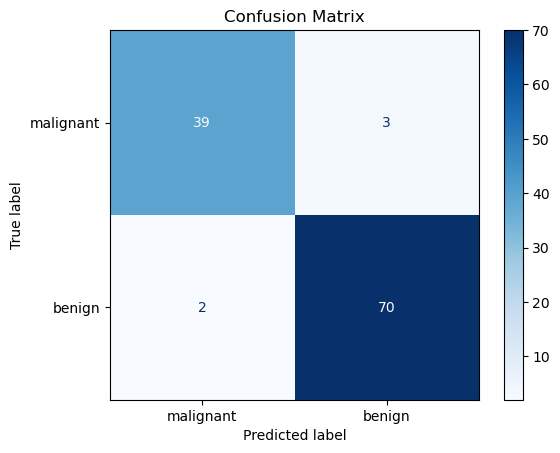

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Exercise 1

1. Use K nearest neighbors to perform the classification
2. Plot the confusion matrix and compare it from the one obtained for the logistic regression.
3. (Optional) Try scaling features before fitting.

/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


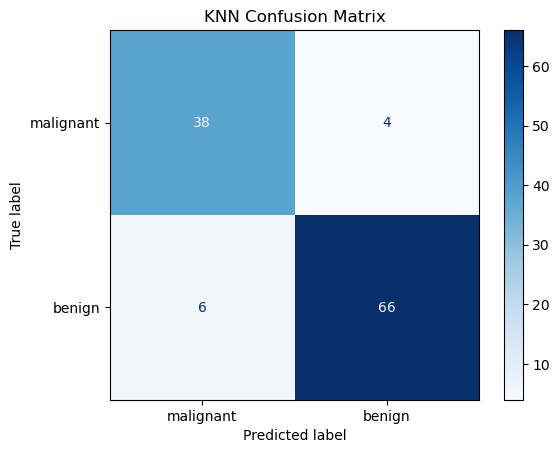

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)  # you can try 3, 7, etc.

# Train
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


/Users/claudiaserranocolome/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


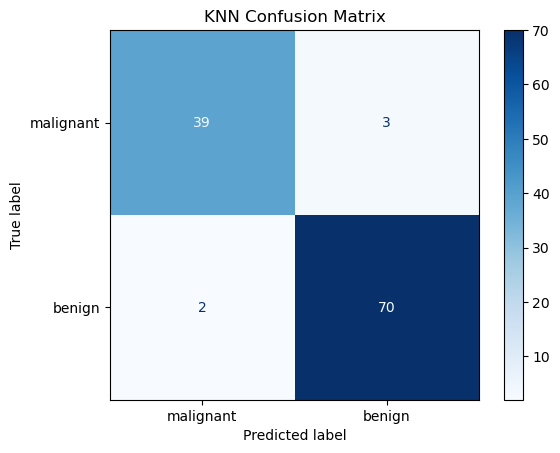

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

knn_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_scaled.fit(X_train, y_train)
# Confusion Matrix

cm = confusion_matrix(y_test, knn_scaled.predict(X_test))
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

### Exercise 2:

1. Do the same using Decision Trees. Important: Setting max_depth helps prevent overfitting.
2. Plot feature importance.
3. Decision Trees are intuitive and interpretable — they learn “if–then” rules. Visualie the tree and interpret.

**1. Do the same using Decision Trees. Important: Setting max_depth helps prevent overfitting.**

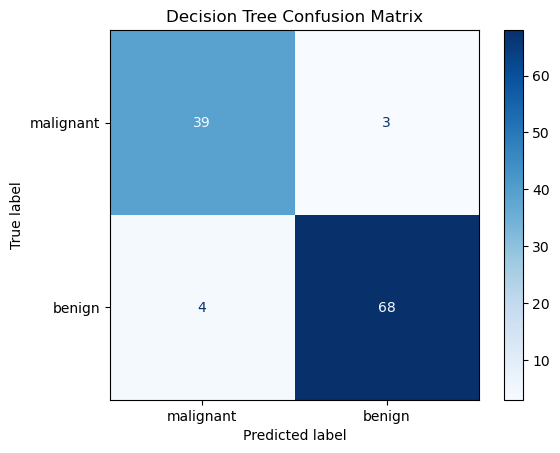

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train a Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=4)  # limit depth for interpretability
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


**2. Plot feature importance.**

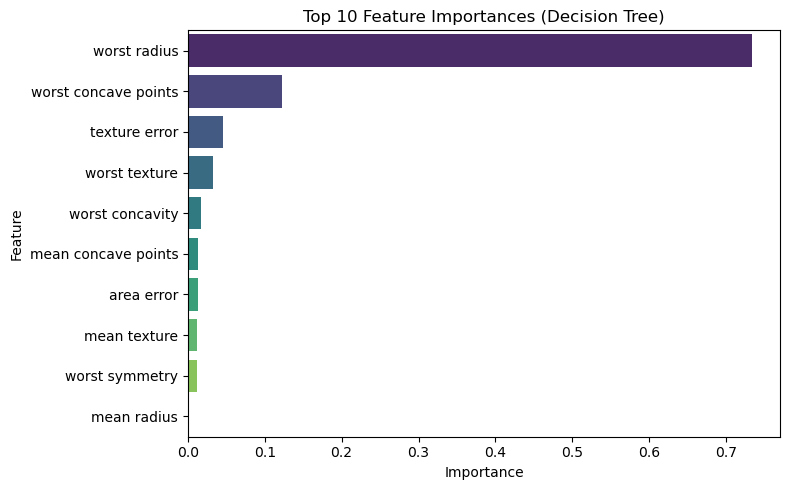

In [95]:
# Visualize feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()

**3. Decision Trees are intuitive and interpretable — they learn “if–then” rules. Visualie the tree and interpret.**

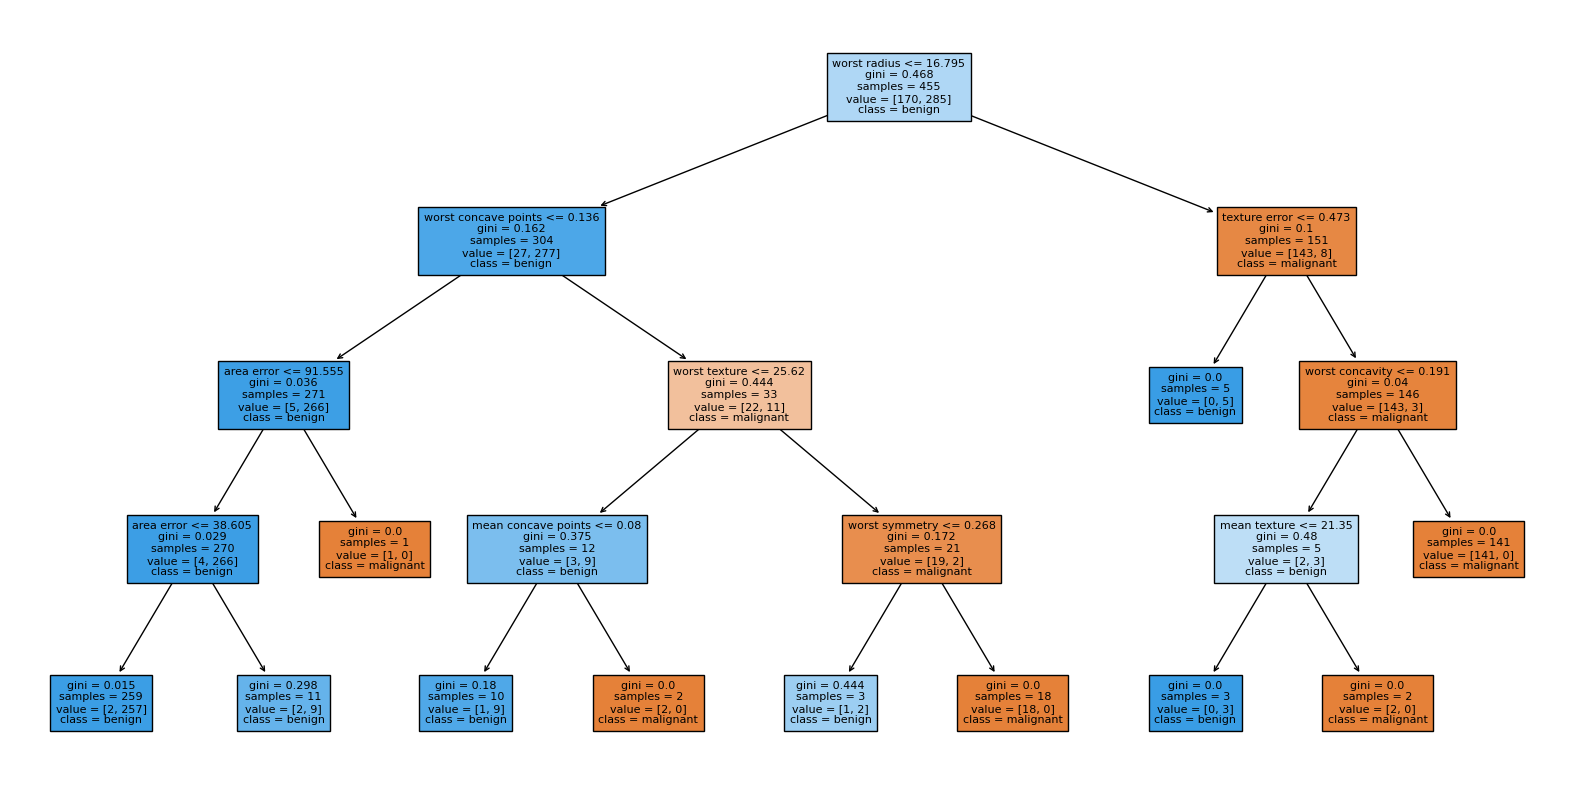

In [96]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=cancer.target_names, filled=True, fontsize=8)
plt.show()

### Exercise 3:

1. Do the same using Random Forest.
2. Plot feature importance.
3. Compare with the results obtained from the Decision Tree. What are the main differences?

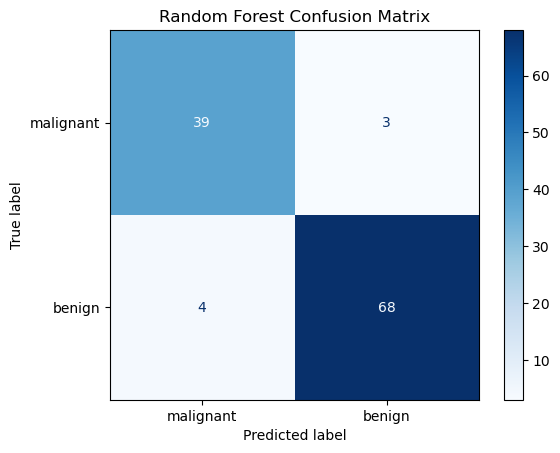

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

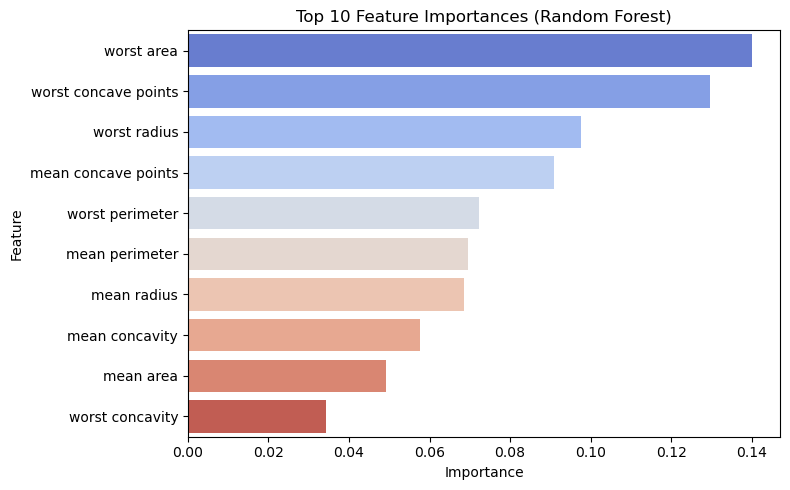

In [109]:
# Plot feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

### Exercise 4: Hyperparameter Search

1. Try different max_depth for the Decision tree model. Which number is the best choice?
2. Try different number of trees for the Random Forest model. Which number is the best?
3. Is overfitting noticeable?

*Hint: maybe it is convenient to look into from sklearn.model_selection import GridSearchCV*

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 4, 6, 8, None]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 4}
Best CV Accuracy: 0.9384615384615385
